# Climate Change

Rising temperatures, extreme weather, and natural disasters are experienced globally each year. The upward climb of average temperature means a changing climate that is causing life to adapt to globally. Data has been gathered to reveal the population growth, greenhouse gases and other factors and other factors that may have a strong correlation of a rising sea level and the average temperature per country. The data that was found reveals strong indicators of aspects that are contributing to climate change.

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy.stats as st
import os
import csv

## How have emissions changed over time?

##### Analysis completed by Lauren McCarthy

Global emissions have been rising over the years - with average CO2 emissions being the largest contributor overtime. The majority of greenhouse gases include Carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O). Within our dataset, there was a drastic increase in average global CO2 emissions from 128.58 million metric tons to 566.97 million metric tons over the time span of 1950 to 2019. Within this increase, there is large variability in emissions around the world with some countries contributing significantly more to overall emissions than others. In some of the already higher contributing countries, China and the US  stand out in terms of CO2 emission since the 1950’s. Even when considering a shorter span of time from 2000 to 2013, there is a notable increase in CO2 emissions (454.89 million metric tons to 647.04 millions metric tons). It is clear that emissions have been increasing over time around the world.

In [5]:
emissions_df_orig = pd.read_csv("data/emissions.csv")
# Select necessary columns
cleaned_df = emissions_df_orig[["iso_code", "country", "year", "co2", "methane", "nitrous_oxide", "total_ghg"]]
# Remove all data prior to 1950
cleaned_filtered_df = cleaned_df[cleaned_df['year'] >= 1950]

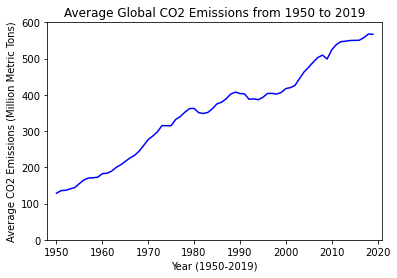

In [6]:
## Global CO2 average per year 

# Group dataframe by year
grouped_global_df = cleaned_filtered_df.groupby(["year"])

# Calculate the global average CO2 per year
avg_global_co2 = grouped_global_df["co2"].mean()

# Generate and format line graph 
x_axis = np.arange(1950, 2020, 1)
co2_plot = plt.plot(x_axis, avg_global_co2, color="blue", label="CO2" )
plt.title("Average Global CO2 Emissions from 1950 to 2019")
plt.xlabel("Year (1950-2019)")
plt.ylabel("Average CO2 Emissions (Million Metric Tons)")
plt.xlim(1948, 2021)
plt.ylim(0, 600)

plt.savefig("Final-Images/AvgGlobalCO2.png")
plt.show()

In [7]:
# Gather average global emissions for 1950 and 2019 for comparison 
avg_global_co2

year
1950    128.579283
1951    135.720637
1952    136.689674
1953    140.614370
1954    144.168297
           ...    
2015    550.281284
2016    550.625404
2017    557.505484
2018    567.764196
2019    566.972956
Name: co2, Length: 70, dtype: float64

In [8]:
# Global change by selected countries

# Create dataframes for each country 
us_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "United States"]
china_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "China"]
india_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "India"]
russia_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "Russia"]
japan_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "Japan"]

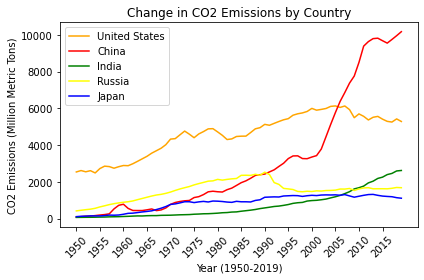

In [9]:
# Generate line graph for each countries CO2 emissions 
us_plot, = plt.plot(us_df["year"], us_df["co2"], color="orange", label="United States" )
china_plot, = plt.plot(china_df["year"], china_df["co2"], color="red", label="China" )
india_plot, = plt.plot(india_df["year"], india_df["co2"], color="green", label="India" )
russia_plot, = plt.plot(russia_df["year"], russia_df["co2"], color="yellow", label="Russia" )
japan_plot, = plt.plot(japan_df["year"], japan_df["co2"], color="blue", label="Japan" )

# Format chart
plt.xticks(np.arange(1950,2019,step=5))
plt.xticks(rotation=45)
plt.title("Change in CO2 Emissions by Country")
plt.xlabel("Year (1950-2019)")
plt.ylabel("CO2 Emissions (Million Metric Tons)")
plt.legend(handles=[us_plot, china_plot, india_plot, russia_plot, japan_plot ], loc="best")

plt.tight_layout()
plt.savefig("Final-Images/CountryChangeCO2.png")
plt.show()

In [10]:
## Line graph for average emission for CO2, methane, and nitrous oxide per year

# Load in CSV to create dataframe 
emissions_df = pd.read_csv("data/question2_df.csv")
emissions_df.head()

,iso,country,year,co2,methane,nitrous_oxide,total_ghg,avg_temp_c,avg_temp_f
0,AFG,Afghanistan,2000,0.758,10.59,3.62,15.05,15.822667,60.48080
1,AFG,Afghanistan,2001,0.798,9.36,3.22,13.47,15.847917,60.52625
2,AFG,Afghanistan,2002,1.052,11.21,3.72,16.10,15.714583,60.28625
3,AFG,Afghanistan,2003,1.186,11.56,3.92,16.78,15.132583,59.23865
4,AFG,Afghanistan,2004,0.889,11.47,3.82,16.35,16.128417,61.03115


In [11]:
# Groupby year
grouped_emissions_df = emissions_df.groupby(["year"])

# Calculate averages for CO2, methane, and nitrous oxide
avg_co2_df = grouped_emissions_df["co2"].mean()
avg_methane_df = grouped_emissions_df["methane"].mean()
avg_no_df = grouped_emissions_df["nitrous_oxide"].mean()

# Create dataframe
summary_df = pd.DataFrame({"Average CO2": avg_co2_df,
                           "Average Methane": avg_methane_df, 
                           "Average Nitrous Oxide": avg_no_df})

summary_df

,Average CO2,Average Methane,Average Nitrous Oxide
year,,,
2000,454.887413,121.600444,42.705333
2001,458.145348,123.020000,43.345111
2002,469.601761,127.956889,44.674889
2003,492.452109,127.683778,44.620222
2004,518.109522,130.576000,45.745778
2005,536.110065,129.467333,45.446000
2006,553.390348,133.684889,46.500222
2007,571.370087,133.110222,47.098000
2008,583.400630,134.946889,46.842444


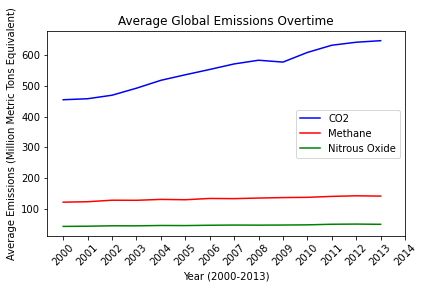

In [12]:
x_axis = summary_df.index

# Generate and format line graph for average emissions over time
co2_plot, = plt.plot(x_axis, summary_df["Average CO2"], color="blue", label="CO2" )
methane_plot, = plt.plot(x_axis, summary_df["Average Methane"], color="red", label="Methane" )
nitrous_oxide_plot, = plt.plot(x_axis, summary_df["Average Nitrous Oxide"], color="green", label="Nitrous Oxide" )
plt.xticks(np.arange(2000,2015,step=1))
plt.xticks(rotation=45)
plt.title("Average Global Emissions Overtime")
plt.xlabel("Year (2000-2013)")
plt.ylabel("Average Emissions (Million Metric Tons Equivalent)")
plt.legend(handles=[co2_plot, methane_plot, nitrous_oxide_plot], loc="best")

plt.tight_layout()
plt.savefig("Final-Images/AvgGlobalSplit.png")
plt.show()

## Is there a correlation between population growth and climate change?

In [13]:
##### Analysis completed by Shalyn Lavoie

Looking at the data provided, Germany, Japan, Singapore, and Ukraine have a net negative decline in population growth while other countries have a positive increase in population growth. Looking overall at temperatures we can see that there has been an average increase of temperature over the years. Looking at the correlation coefficient of 0.52, we can see that the population growth and average temperature are moderately correlated. Taking it a step further the r-squared value of 0.26 we can also see that in comparing the average temperatures and the population growth we have substantial data. Comparing population growth to average temperature the data shows that there is a correlation.

In [14]:
#Study data file
popvstemp_df = pd.read_csv("data/question3_df.csv")
tempsofcities_df = pd.read_csv("data/temps_bycity_clean.csv")

In [15]:
#Select columns
summary_df = popvstemp_df[["country","year", "pop_total", "pop_growth", "avg_temp_f"]]
summary_df

,country,year,pop_total,pop_growth,avg_temp_f
0,Afghanistan,2000,20779953,2.975053,60.48080
1,Afghanistan,2001,21606988,3.902806,60.52625
2,Afghanistan,2002,22600770,4.496720,60.28625
3,Afghanistan,2003,23680871,4.668361,59.23865
4,Afghanistan,2004,24726684,4.321539,61.03115
...,...,...,...,...,...
555,Zimbabwe,2009,12526968,1.183792,68.94290
556,Zimbabwe,2010,12697723,1.353893,70.09850
557,Zimbabwe,2011,12894316,1.536391,69.40715
558,Zimbabwe,2012,13115131,1.698001,68.94200


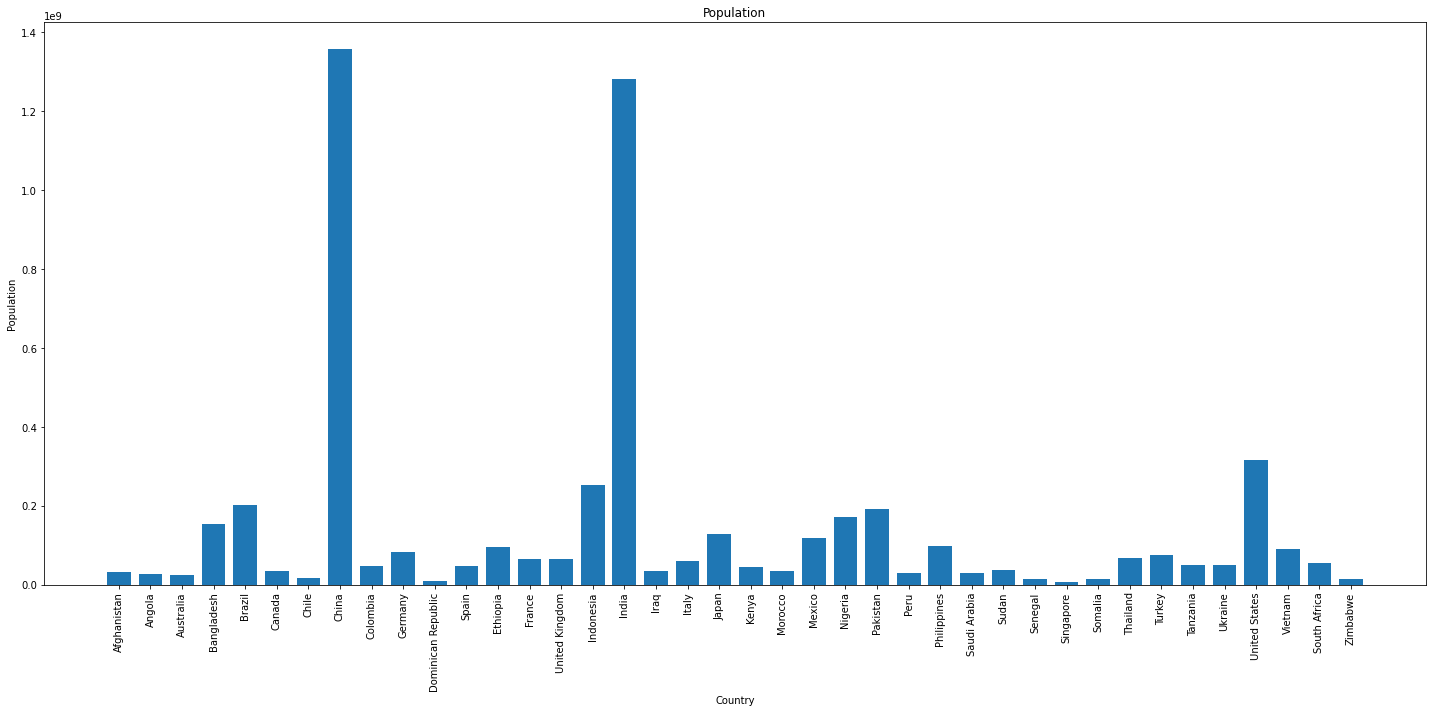

In [16]:
labels = ['country']
populationgrowth = ['pop_growth']

x = np.arange(len(labels))
width = 0.5
x_values = summary_df['country']
y_values = summary_df['pop_total']
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width = 0.75)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population')
plt.tight_layout()
plt.savefig("Final-Images/Population.png")
plt.show()

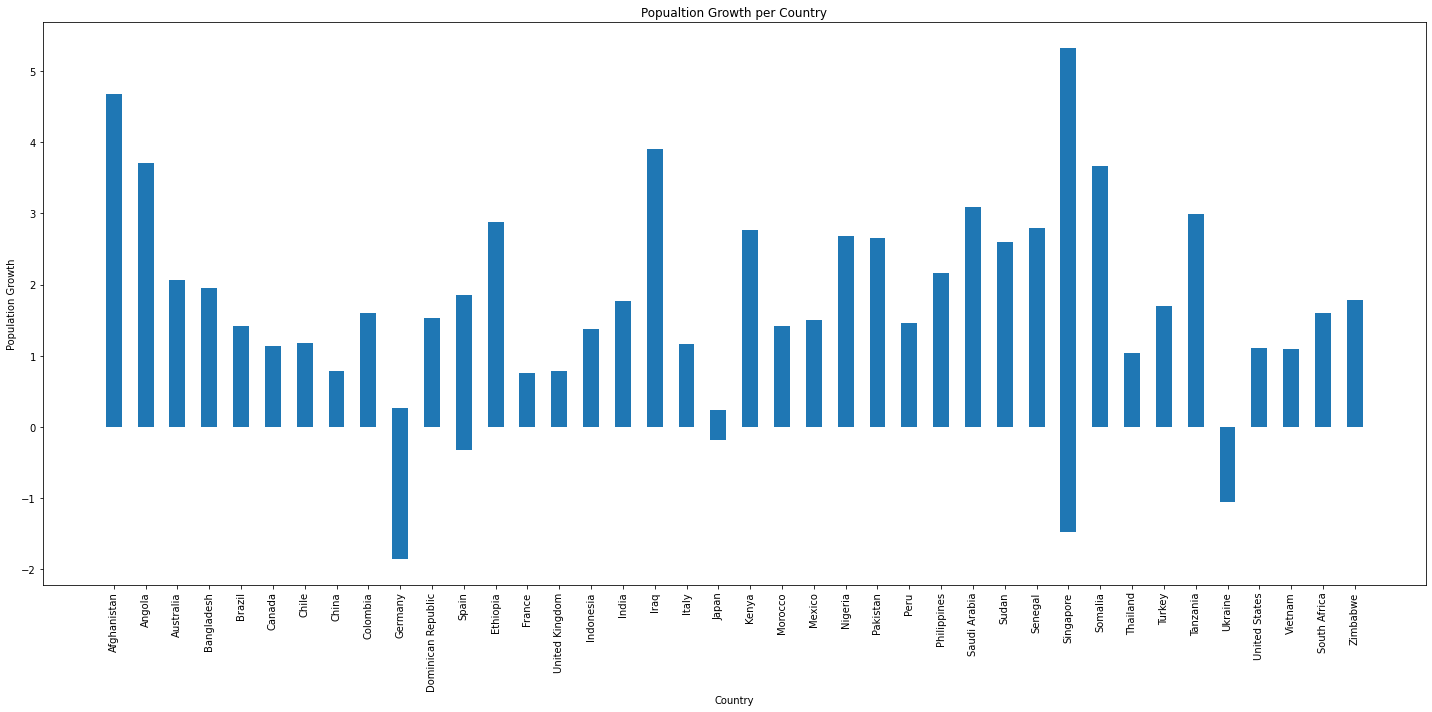

In [17]:
x = np.arange(len(labels))
width = 0.5
x_values = summary_df['country']
y_values = summary_df['pop_growth']
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width = 0.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population Growth')
plt.title('Popualtion Growth per Country')
plt.tight_layout()
plt.savefig("Final-Images/Populationgrowth.png")
plt.show()

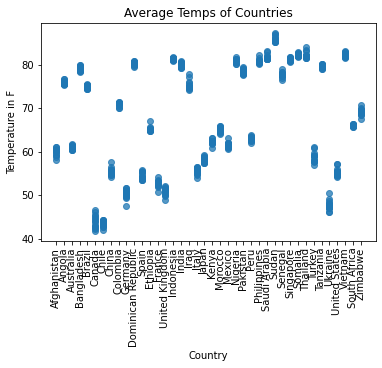

<Figure size 576x576 with 0 Axes>

In [18]:
x = summary_df['country']
y = summary_df['avg_temp_f']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y, alpha= 0.75)

# Add labels and title to plot
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Temperature in F")
plt.title('Average Temps of Countries')
plt.figure(figsize=(8,8))
# Display plot
plt.tight_layout()
plt.show()

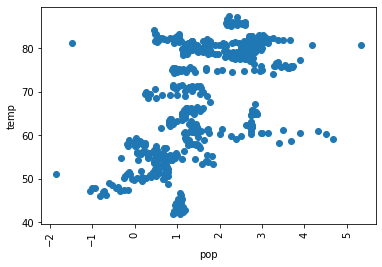

<Figure size 720x1440 with 0 Axes>

In [19]:
x = popvstemp_df['pop_growth']
y = popvstemp_df['avg_temp_f']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xticks(rotation=90)
plt.xlabel("pop")
plt.ylabel("temp")
plt.title('')
plt.figure(figsize=(10,20))
# Display plot
plt.tight_layout()
plt.show()

In [20]:
x = summary_df['pop_growth']
y = summary_df['avg_temp_f']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between population and temp is {round(correlation[0],2)}.""")

The correlation between population and temp is 0.52.


The r-squared is: 0.26704026672553993


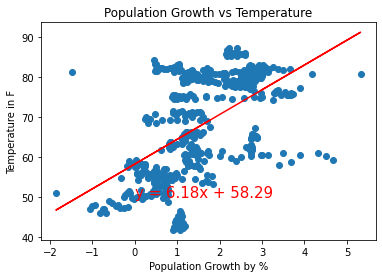

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Population Growth by %")
plt.ylabel("Temperature in F")
plt.title('Population Growth vs Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Final-Images/populationgrowthvstemperature.png")
plt.show()

In [22]:
popgrowth = summary_df["pop_growth"].unique()
popgrowth

array([ 2.97505285,  3.9028057 ,  4.49671956,  4.66836149,  4.3215393 ,
        3.6827318 ,  2.99047809,  2.4938423 ,  2.26827714,  2.39702099,
        2.74657628,  3.1431259 ,  3.40758697,  3.49458905,  3.27720356,
        3.30119818,  3.32925667,  3.37881111,  3.45301383,  3.53755715,
        3.61957456,  3.68063537,  3.71053132,  3.70387768,  3.6714624 ,
        3.63415863,  3.59777431,  3.55195047,  1.19227232,  1.34835834,
        1.22056379,  1.23399666,  1.15935216,  1.31978955,  1.47522795,
        0.62467844,  2.00402174,  2.06104513,  1.55548959,  1.38952732,
        1.74582   ,  1.72115144,  1.95238739,  1.88628714,  1.82007022,
        1.73126612,  1.61519802,  1.48474477,  1.34713026,  1.22661778,
        1.14565302,  1.11680573,  1.12480349,  1.14426213,  1.15494813,
        1.15671345,  1.42416743,  1.36695708,  1.31274419,  1.25738274,
        1.20129413,  1.145881  ,  1.09019685,  1.03786204,  0.99431162,
        0.96194826,  0.93795674,  0.91596266,  0.89353106,  0.87

## How do temperature and emissions relate to extreme weather?

##### Analysis completed by Nicole Pierre

Extreme weather is not uncommon here in the United States. For example, in the year 2020, there was a record number of hurricanes. One possible explanation for this extreme weather is climate change.  Looking at the grouped bar graph comparing average temperature from the year 2000 and 2013, most countries have had a multiple-degree increase in average temperature. Canada has the highest increase in average temperature (42 to 46). Germany has the highest decrease in average temperature (51.7 to 50.2). Referencing the Average Global CO2 Emissions line graph from question 1, the amount of CO2 emission has significantly increased from 1950 to 2020. As CO2 emissions increase, the average temperature increases overall meaning there is a positive correlation between the two. As CO2 and temperature increase there are constant spikes in the number of disasters. Looking at the line graph for Number of Disasters Every Year, every 2-3 years there is a spike in the number of disasters. Looking at the line graph showing the total affected globally, there is not a spike in those affected in the same years that the number of disasters spike. This shows that the disasters are not getting worse or more dangerous but they are just happening at a higher, more frequent rate. We can conclude that the increase in CO2 emissions leads to an increase in average temperature which results in a higher number of disasters each year. 

In [23]:
# Study data files
question4_df_path = "data/question4_df.csv"
disasters_clean_path = "data/disasters_clean.csv"

# Read the mouse data and the study results
question4_dfdata = pd.read_csv(question4_df_path)
disasters_cleandata   = pd.read_csv(disasters_clean_path)

# Combine the data into a single dataset
combined_q4_data = pd.merge(question4_dfdata, disasters_cleandata, on="iso")

# Display the data table for preview
combined_q4_data

,country_x,region_x,year_x,avg_precip,avg_temp_c,avg_temp_f,iso,co2,methane,nitrous_oxide,...,continent,disaster group,disaster subgroup,disaster type,disaster subtype,disaster subsubtype,total deaths,total affected,latitude,longitude
0,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Climatological,Drought,Drought,NaN,37.0,2580000.0,NaN,NaN
1,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,NaN,36.424,70.881
2,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Meteorological,Extreme temperature,Cold wave,NaN,150.0,100000.0,NaN,NaN
3,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Geophysical,Earthquake,Ground movement,NaN,4.0,270.0,35.169,69.389
4,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Meteorological,Extreme temperature,Cold wave,NaN,177.0,100000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59229,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,31.0,2000.0,NaN,NaN
59230,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Meteorological,Storm,Tropical cyclone,NaN,251.0,113023.0,NaN,NaN
59231,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Meteorological,Storm,Tropical cyclone,NaN,628.0,270186.0,NaN,NaN
59232,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Climatological,Drought,Drought,NaN,NaN,6900000.0,NaN,NaN


In [24]:
#Check what countries
unique_countries = question4_dfdata['country'].unique()
unique_countries

array(['Afghanistan', 'Angola', 'Australia', 'Bangladesh', 'Brazil',
       'Canada', 'Chile', 'China', 'Colombia', 'Germany',
       'Dominican Republic', 'Spain', 'Ethiopia', 'France',
       'United Kingdom', 'Indonesia', 'India', 'Iraq', 'Italy', 'Japan',
       'Kenya', 'Morocco', 'Mexico', 'Nigeria', 'Pakistan', 'Peru',
       'Philippines', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore',
       'Somalia', 'Thailand', 'Turkey', 'Tanzania', 'Ukraine',
       'United States', 'Vietnam', 'South Africa', 'Zimbabwe'],
      dtype=object)

In [25]:
question4_dfdata[question4_dfdata['year']==2000]['avg_temp_f'].unique()

array([60.4808    , 75.9386    , 60.69875   , 78.62945   , 74.5033    ,
       42.630575  , 42.70595   , 54.8234    , 70.012775  , 51.7346    ,
       79.42445   , 53.9654    , 64.83425   , 53.1314    , 50.9345    ,
       81.1772    , 79.58023571, 75.0134    , 56.16365   , 58.25255   ,
       62.12225   , 64.6946    , 61.00505   , 80.0901    , 78.65795   ,
       62.6327    , 80.6372    , 81.2573    , 85.31825   , 77.4668    ,
       80.7737    , 82.01735   , 81.5414    , 57.59015   , 79.1303    ,
       47.87375   , 54.62125   , 81.66005   , 66.100475  , 68.5106    ])

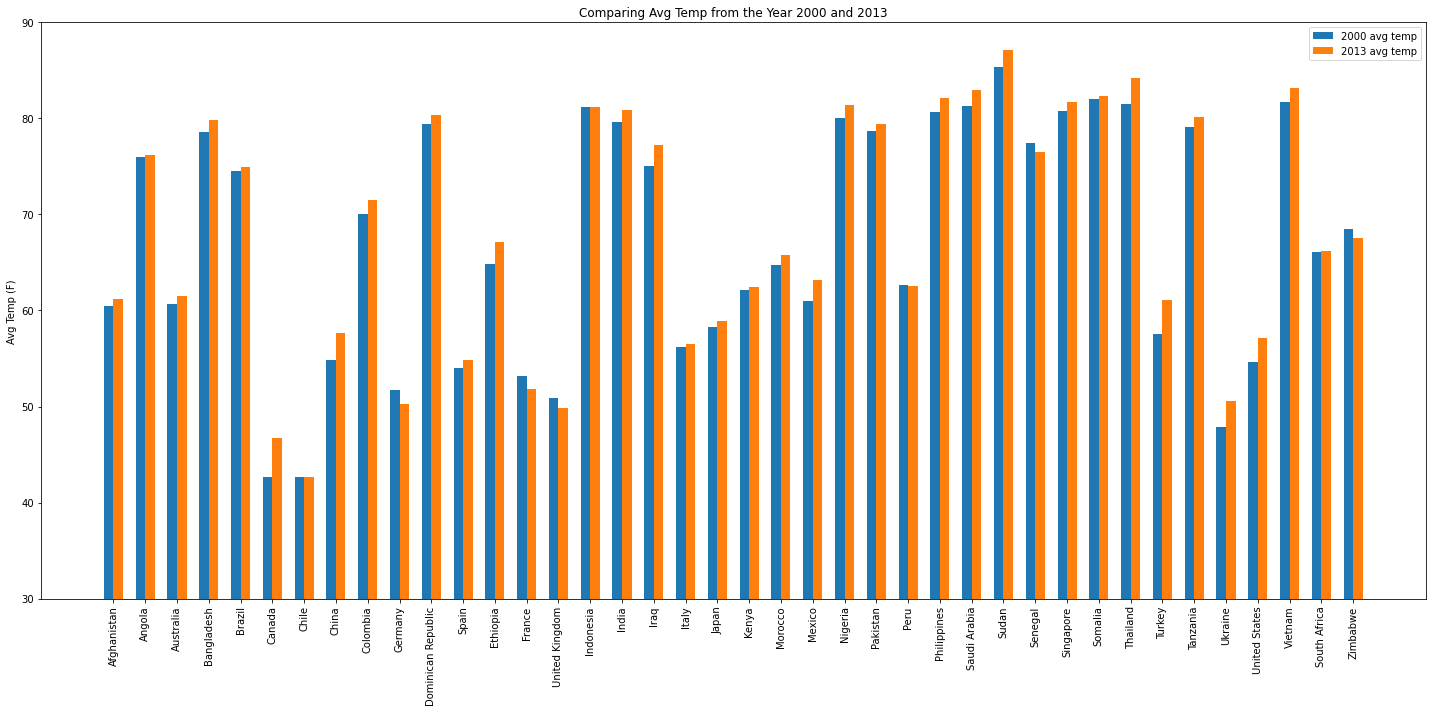

In [26]:
#Separate data into labels, avgtemp_2000 and avgtemp_2013
labels = unique_countries
avgtemp_2000 = question4_dfdata[question4_dfdata['year']==2000]['avg_temp_f'].unique()
avgtemp_2013 = question4_dfdata[question4_dfdata['year']==2013]['avg_temp_f'].unique()

#Create label locations and width of bars
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, avgtemp_2000, width, label='2000 avg temp')
rects2 = ax.bar(x + width/2, avgtemp_2013, width, label='2013 avg temp')

#Add some labels and customize 
ax.set_ylabel('Avg Temp (F)')
ax.set_title('Comparing Avg Temp from the Year 2000 and 2013')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
ax.set_ylim(30,90)

fig.tight_layout()
plt.savefig("Final-Images/AvgTemp_per_country.png")
plt.show()

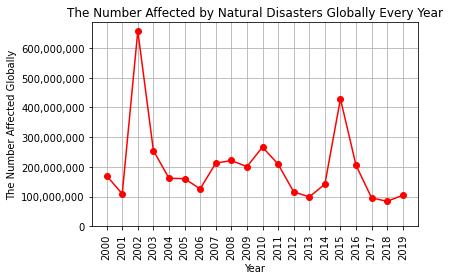

In [27]:
#formatting function
def comma_format(x):
    return '{:,}'.format(x)

#Calculate total affected globally per year
total_deaths_list = []
years = disasters_cleandata['year'].unique()
for year in years:
    subset = disasters_cleandata[disasters_cleandata['year']==year]
    total = np.sum(subset['total affected'])
    total_deaths_list.append(total)
total_deaths_list

y_tix = pd.Series(range(0,700000000, 100000000))
y_lbls = y_tix.apply(comma_format)

#Create line plot
plt.plot(years, total_deaths_list, color='r', marker='o')
plt.title("The Number Affected by Natural Disasters Globally Every Year")
plt.ylabel("The Number Affected Globally")
plt.xlabel("Year")
plt.xticks(years, rotation="vertical")
plt.yticks(y_tix, labels=y_lbls)
plt.grid(True)
plt.tight_layout()
plt.savefig("Final-Images/NatDisaster_deaths.png")

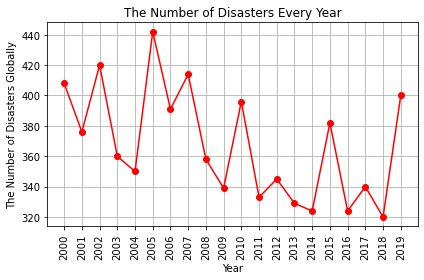

In [28]:
#Calculate total disasters globally per year
total_disasters_list = []
years = disasters_cleandata['year'].unique()
for year in years:
    subset = disasters_cleandata[disasters_cleandata['year']==year]
    total = len(subset['year'])
    total_disasters_list.append(total)
total_disasters_list

#Create line plot
plt.plot(years, total_disasters_list, color='r', marker='o')
plt.title("The Number of Disasters Every Year")
plt.ylabel("The Number of Disasters Globally")
plt.xlabel("Year")
plt.grid(True)
plt.xticks(years, rotation="vertical")
plt.tight_layout()
plt.savefig("Final-Images/num_of_disasters.png")
plt.show()

##### Analysis completed by Moriah Taylor

In the United Nations Framework Convention on Climate Change (UNFCCC), countries are organized by region but also into special interest groups. A few of these groups are Least-Developed Countries (LDC), Small Island Developing States (SIDS), and Organization of Petroleum-Exporting Countries (OPEC). In these graphs, Bangladesh represents the LDC group, Dominican Republic represents the SIDS group, Saudi Arabia represents the OPEC group and Germany represents the European Union (EU). Economies - The GDP plots show how the economies of the US, China, and Germany are drastically larger than those of Bangladesh, Dominican Republic, and Saudi Arabia. The emissions plot shows that the United States and China are significant contributors of greenhouse gases. The other 4 countries have 1,000 million tonnes of CO2 equivalent of greenhouse gas emissions or less, while the United States stays steady around 6,000 million tonnes, and China shockingly increases from about 4,000 million tonnes to nearly 12,000 million tonnes from 2000 to 2013. The temperature plots show that the average temperatures for China and the United States increased 2-3 degrees Fahrenheit from 55 degrees to 57-58 degrees. The plots also show that the smaller countries all average temperatures above 78 degrees Fahrenheit and increased 1-2 degrees from the year 2000 to 2013. All together, this information indicates that these smaller countries which are contributing astronomically less to global emissions and have much smaller economies are still suffering the effects of these emissions in the form of temperature increase. Although China and the United States have temperatures increasing as well, they have the financial ability to be able to increase their preparedness for extreme weather through early warning systems and structural building changes. These smaller countries do not have the ability to fund these types of projects and are going to suffer because of it, especially the small island developing states which are directly and harshly affected by sea level rise and tropical storms.

In [29]:
stats_data = pd.read_csv("data/question1_df.csv")
stats_data.head()

,iso,country,region,year,pop_total,pop_growth,gdp,imports,exports,avg_precip,co2,methane,nitrous_oxide,total_ghg,avg_temp_c,avg_temp_f
0,AFG,Afghanistan,South Asia,2000,20779953,2.975053,NaN,NaN,NaN,NaN,0.758,10.59,3.62,15.05,15.822667,60.48080
1,AFG,Afghanistan,South Asia,2001,21606988,3.902806,NaN,NaN,NaN,NaN,0.798,9.36,3.22,13.47,15.847917,60.52625
2,AFG,Afghanistan,South Asia,2002,22600770,4.496720,7.465115e+09,NaN,NaN,327.0,1.052,11.21,3.72,16.10,15.714583,60.28625
3,AFG,Afghanistan,South Asia,2003,23680871,4.668361,8.124454e+09,NaN,NaN,NaN,1.186,11.56,3.92,16.78,15.132583,59.23865
4,AFG,Afghanistan,South Asia,2004,24726684,4.321539,8.239344e+09,NaN,NaN,NaN,0.889,11.47,3.82,16.35,16.128417,61.03115


In [30]:
#identify countries by their unfccc negotiating parties
##small island developing states
sids = ['Bahrain', 'Cabo Verde', 'Comoros', 'Guinea-Bissau', 'Maldives', 'Mauritius', 
        'Sao Tomé and Principe', 'Seychelles', 'Singapore', 'Antigua and Barbuda', 
        'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica', 'Dominican Republic',
        'Grenada', 'Guyana', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 
        'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago',
        'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)',
        'Nauru', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Timor-Leste',
        'Tonga', 'Tuvalu', 'Vanuatu']
##least developed countries
ldc = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
       'Djibouti', 'Eritrea', 'Ethiopia', 'Gambia', 'Guinea', 'Guinea Bissau', 'Haiti', 'Kiribati',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda', 'Sao Tome and Principe', 
       'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 'Timor Leste', 
       'Togo', 'Tuvalu', 'Uganda', 'United Republic of Tanzania', 'Vanuatu', 'Yemen', 'Zambia']
##european union
eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 
      'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
      'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 
      'Slovenia', 'Spain', 'Sweden']
#organization of petroleum-exporting countries
opec = ['Algeria', 'Angola', 'Congo', 'Ecuador', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq', 
        'Kuwait', 'Libya', 'Nigeria', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Venezuela']

In [31]:
#subset to countries of interest
#picking one country to represent each special interest group and
#selecting the United States and China as well
countries_of_interest = ["United States", "China", "Germany", "Bangladesh", 
                         "Dominican Republic", "Saudi Arabia"]
stats_reduced = stats_data[stats_data['country'].isin(countries_of_interest)]
stats_reduced

,iso,country,region,year,pop_total,pop_growth,gdp,imports,exports,avg_precip,co2,methane,nitrous_oxide,total_ghg,avg_temp_c,avg_temp_f
42,BGD,Bangladesh,South Asia,2000,127657854,1.952387,6.701347e+10,6.403171e+09,6.588074e+09,NaN,26.525,69.01,21.38,136.20,25.905250,78.629450
43,BGD,Bangladesh,South Asia,2001,130088702,1.886287,7.041594e+10,7.225891e+09,7.227576e+09,NaN,31.035,69.16,21.90,140.36,25.931250,78.676250
44,BGD,Bangladesh,South Asia,2002,132478086,1.820070,7.311507e+10,6.875622e+09,6.791242e+09,2666.0,31.981,70.23,22.40,143.71,26.095000,78.971000
45,BGD,Bangladesh,South Asia,2003,134791603,1.731266,7.658041e+10,7.463456e+09,6.876857e+09,NaN,33.459,71.19,21.98,145.52,25.927417,78.669350
46,BGD,Bangladesh,South Asia,2004,136986432,1.615198,8.059286e+10,1.378870e+10,7.257330e+09,NaN,35.945,71.09,22.11,148.32,26.136083,79.044950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,USA,United States,North America,2009,306771529,0.876651,1.461730e+13,2.086299e+12,1.581996e+12,NaN,5491.036,679.85,246.01,5865.86,12.372389,54.270300
514,USA,United States,North America,2010,309321666,0.827846,1.499205e+13,2.360183e+12,1.846280e+12,NaN,5698.056,679.25,250.84,6111.81,13.020167,55.436300
515,USA,United States,North America,2011,311556874,0.720018,1.522455e+13,2.493194e+12,2.102995e+12,NaN,5565.294,670.49,261.57,6235.85,12.787111,55.016800
516,USA,United States,North America,2012,313830990,0.727269,1.556704e+13,2.560677e+12,2.191280e+12,715.0,5367.569,648.75,251.80,5936.09,13.960778,57.129400


In [32]:
#subset to year 2013
stats_2013 = stats_reduced[stats_reduced['year']==2013]
#fill in missing data
stats_2013 = stats_2013.replace(np.nan, 1949992*1000000) #comes from WITS (world integrated trade solution)
#select columns of interest
stats_2013_reduced = stats_2013[["country", "gdp", "imports", "exports"]]

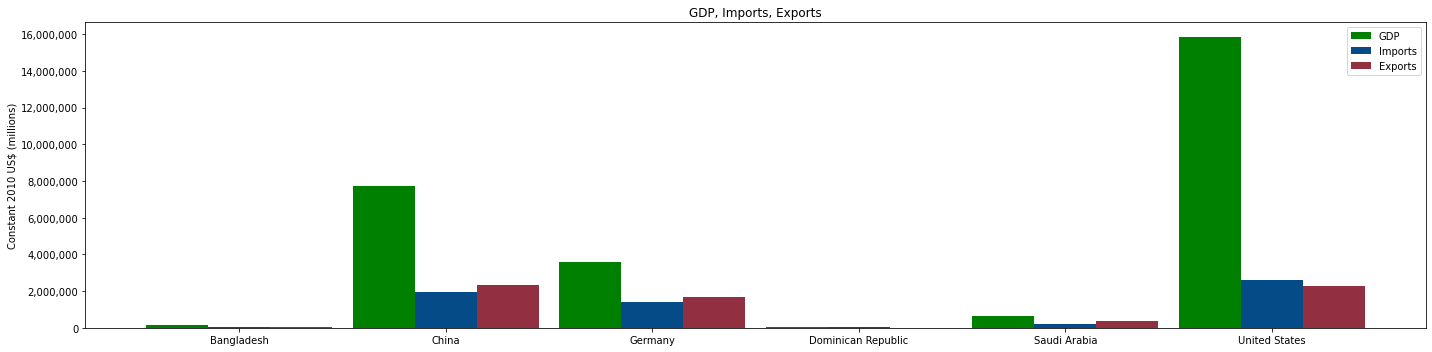

In [33]:
#grouped bar chart for gdp, imports, and exports in 2013
labels = stats_2013_reduced['country']
GDP = stats_2013_reduced['gdp']/1000000
Imports = stats_2013_reduced['imports']/1000000
Exports = stats_2013_reduced['exports']/1000000

#formatting function
def comma_format(x):
    return '{:,}'.format(x)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
y_tix = pd.Series(range(0, 18000000, 2000000)) #y-range
y_lbls = y_tix.apply(comma_format)  #y axis labels

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, GDP, width, label='GDP', color="green")
rects2 = ax.bar(x, Imports, width, label='Imports', color="#044B88")
rects3 = ax.bar(x + width, Exports, width, label='Exports', color="#923041")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constant 2010 US$ (millions)')
ax.set_title('GDP, Imports, Exports')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y_tix)
ax.set_yticklabels(y_lbls)
ax.legend()

fig.patch.set_facecolor('xkcd:white')
fig.set_size_inches(20, 5)
fig.tight_layout()

plt.savefig('Final-Images/gdp_all.png')
plt.show()

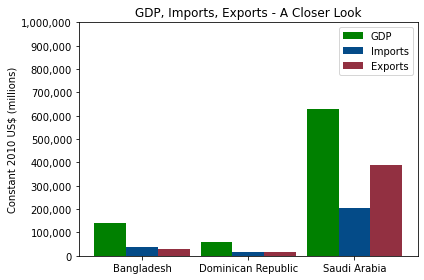

In [34]:
#taking a closer look at smaller countries
reduced_reduced = stats_2013_reduced[stats_2013_reduced['country'].isin(["Bangladesh", "Dominican Republic", "Saudi Arabia"])]
labels = reduced_reduced['country']
GDP = reduced_reduced['gdp']/1000000
Imports = reduced_reduced['imports']/1000000
Exports = reduced_reduced['exports']/1000000

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
y_tix = pd.Series(range(0, 1100000, 100000)) #y-range
y_lbls = y_tix.apply(comma_format)  #y axis labels

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, GDP, width, label='GDP', color="green")
rects2 = ax.bar(x, Imports, width, label='Imports', color="#044B88")
rects3 = ax.bar(x + width, Exports, width, label='Exports', color="#923041")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constant 2010 US$ (millions)')
ax.set_title('GDP, Imports, Exports - A Closer Look')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y_tix)
ax.set_yticklabels(y_lbls)
ax.legend()

fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()

plt.savefig('Final-Images/gdp_smaller_countries.png')
plt.show()

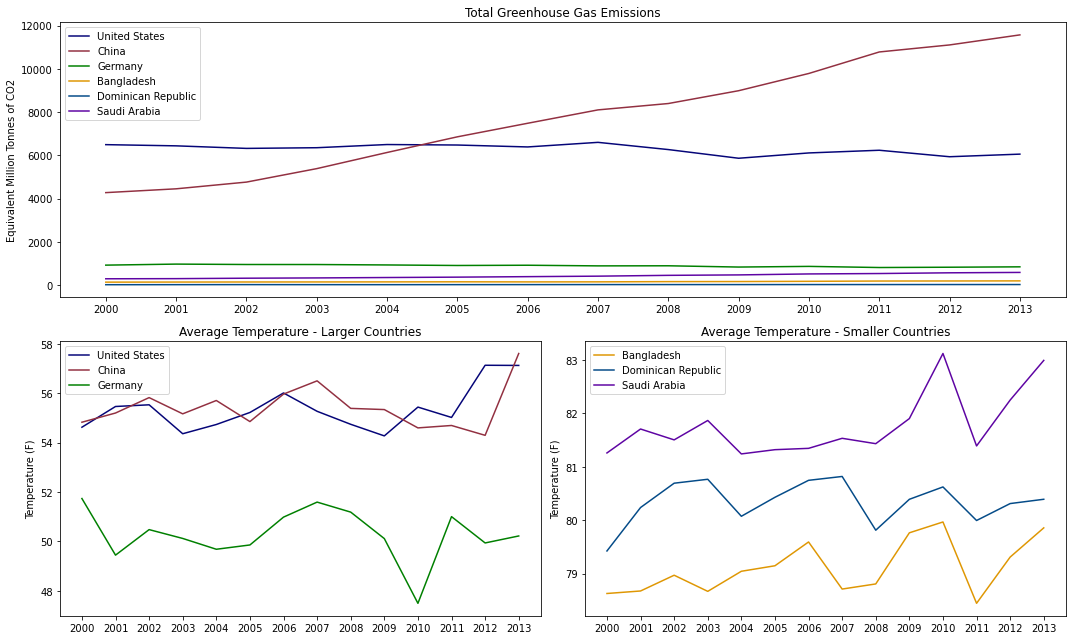

In [35]:
#select climate change-related stats
climate_change_stats = stats_data[['country', 'year', 'total_ghg', 'avg_temp_f']]
years = climate_change_stats['year'].unique()

#subset to each country
usa = climate_change_stats[climate_change_stats['country']=="United States"]
chn = climate_change_stats[climate_change_stats['country']=="China"]
deu = climate_change_stats[climate_change_stats['country']=="Germany"]
bgd = climate_change_stats[climate_change_stats['country']=="Bangladesh"]
dom = climate_change_stats[climate_change_stats['country']=="Dominican Republic"]
sau = climate_change_stats[climate_change_stats['country']=="Saudi Arabia"]

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
fig=plt.figure()

#ghg plot
ax1 = fig.add_subplot(gs[0, :]) # row 0, span all columns
ax1.plot(years, usa['total_ghg'], label='United States', color="#050578")
ax1.plot(years, chn['total_ghg'], label='China', color="#923041")
ax1.plot(years, deu['total_ghg'], label='Germany', color="green")
ax1.plot(years, bgd['total_ghg'], label='Bangladesh', color="#DF9703")
ax1.plot(years, dom['total_ghg'], label='Dominican Republic', color="#044B88")
ax1.plot(years, sau['total_ghg'], label='Saudi Arabia', color="#5E04A3")

ax1.set_ylabel('Equivalent Million Tonnes of CO2')
ax1.set_title('Total Greenhouse Gas Emissions')
ax1.set_xticks(years)
ax1.set_xticklabels(years)
ax1.legend()

#temp plots
##large countries
ax2 = fig.add_subplot(gs[1, 0]) # row 1, col 0
ax2.plot(years, usa['avg_temp_f'], label='United States', color="#050578")
ax2.plot(years, chn['avg_temp_f'], label='China', color="#923041")
ax2.plot(years, deu['avg_temp_f'], label='Germany', color="green")

ax2.set_ylabel('Temperature (F)')
ax2.set_title('Average Temperature - Larger Countries')
ax2.set_xticks(years)
ax2.set_xticklabels(years)
ax2.legend()

#small countries
ax3 = fig.add_subplot(gs[1, 1]) # row 1, col 1
ax3.plot(years, bgd['avg_temp_f'], label='Bangladesh', color="#DF9703")
ax3.plot(years, dom['avg_temp_f'], label='Dominican Republic', color="#044B88")
ax3.plot(years, sau['avg_temp_f'], label='Saudi Arabia', color="#5E04A3")

ax3.set_ylabel('Temperature (F)')
ax3.set_title('Average Temperature - Smaller Countries')
ax3.set_xticks(years)
ax3.set_xticklabels(years)
ax3.legend()

fig.patch.set_facecolor('xkcd:white')
fig.set_size_inches(15,9)
fig.tight_layout()

plt.savefig('Final-Images/emissions_and_temps.png')
plt.show()